In [33]:
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'

# %matplotlib inline
from spectral_cube import SpectralCube
from astropy import units as u
results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/'

In [2]:
import glob
cubefns = glob.glob(f"{results}/source_ab_*_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image")

['/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_103_spw31_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_110_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_149_spw91_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_151_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_139_spw87_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_98_spw106_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_271_spw49_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/s

In [20]:
from astropy import coordinates, units as u
from astropy import wcs
from astropy.io import fits

In [47]:
crd = coordinates.SkyCoord("17:46:10.80 -28:42:13.3", frame='fk5', unit=(u.h, u.deg))

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
cubes = []

for fn in cubefns:

    ch3cncube = SpectralCube.read(fn)
    
    ch3cntbl = ch3cncube.find_lines(chemical_name='CH3CN', line_lists=['JPL'], 
                                    show_upper_degeneracy=True, show_qn_code=True)
    ch3cntbl = ch3cntbl[ch3cntbl['Quantum Number Code'] == 202]
    if len(ch3cntbl) > 0:
        cubes.append(ch3cncube)
        print(fn)
        print(ch3cntbl)


/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_110_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image
Species  Chemical Name  Freq-GHz(rest frame,redshifted) Freq Err(rest frame,redshifted) Meas Freq-GHz(rest frame,redshifted) Meas Freq Err(rest frame,redshifted) Resolved QNs ... E_L (cm^-1)  E_L (K)  E_U (cm^-1)  E_U (K)  Upper State Degeneracy Quantum Number Code Linelist
-------- -------------- ------------------------------- ------------------------------- ------------------------------------ ------------------------------------ ------------ ... ----------- --------- ----------- --------- ---------------------- ------------------- --------
CH3CNv=0 Methyl Cyanide                      110.330345                           1e-07                                   --                                   --    6(5)-5(5) ...    133.3111 191.80618   136.99132 197.10124                   26.0                 202      JPL
CH3CNv=0 Methyl Cyanide                     1

In [26]:
tempmap = fits.open('/blue/adamginsburg/abulatek/brick/first_results/temperature_map/temperature_map_februrary.fits')
colmap = fits.open('/blue/adamginsburg/abulatek/brick/first_results/temperature_map/col_density_map_februrary.fits')
ww = wcs.WCS(temp[0].header)

In [24]:
import pyspeckit
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters
from pyspeckit.spectrum.models import lte_molecule

from spectral_cube import SpectralCube
from astropy import units as u
from astropy import constants

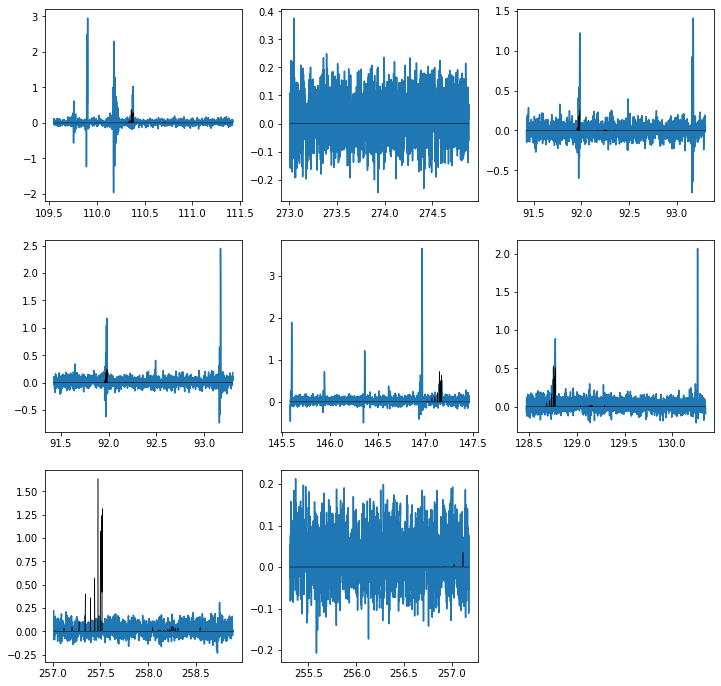

In [48]:
pl.figure(figsize=(12,12))
for ind, ch3cncube in enumerate(cubes):
    ax = pl.subplot(3,3,ind+1)
    
    x,y = map(int, ww.celestial.world_to_pixel(crd))
    T = temp = tempmap[0].data[y,x]
    N = N_tot = colmap[0].data[y,x]
        
    x,y = map(int, ch3cncube.wcs.celestial.world_to_pixel(crd))

    freqs, aij, deg, EU, partfunc = get_molecular_parameters('CH3CN',
                                                             fmin=ch3cncube.spectral_axis.min(),
                                                             fmax=ch3cncube.spectral_axis.max())
    
    
    # TODO: determine this from data
    v_cen = 10*u.km/u.s
    v_disp = 1.5*u.km/u.s

    mod = lte_molecule.generate_model(ch3cncube.spectral_axis, v_cen, v_disp, temp, N_tot,
                              freqs, aij, deg, EU, partfunc)

    data_sp = ch3cncube[:, y, x]
    data_sp_K = data_sp.value * ch3cncube.jtok_factors()
    ax.plot(ch3cncube.spectral_axis.to(u.GHz), data_sp_K)
    ax.plot(ch3cncube.spectral_axis.to(u.GHz),
            mod, linestyle='-', color='k', linewidth=0.5)


In [49]:
N,T

(13.740148490539461, 153.10917256985616)

In [51]:
ch3cncube.jtok_factors()

array([11.708251  , 11.70825372, 11.70825   , ..., 11.70823204,
       11.70823613, 11.70828092])

In [52]:
cubefns

['/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_103_spw31_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_110_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_149_spw91_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_151_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_139_spw87_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_98_spw106_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/source_ab_271_spw49_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image',
 '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/s